In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Fetch data using yfinance
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')
data = data['Close']
data = data.dropna()

[*********************100%***********************]  1 of 1 completed


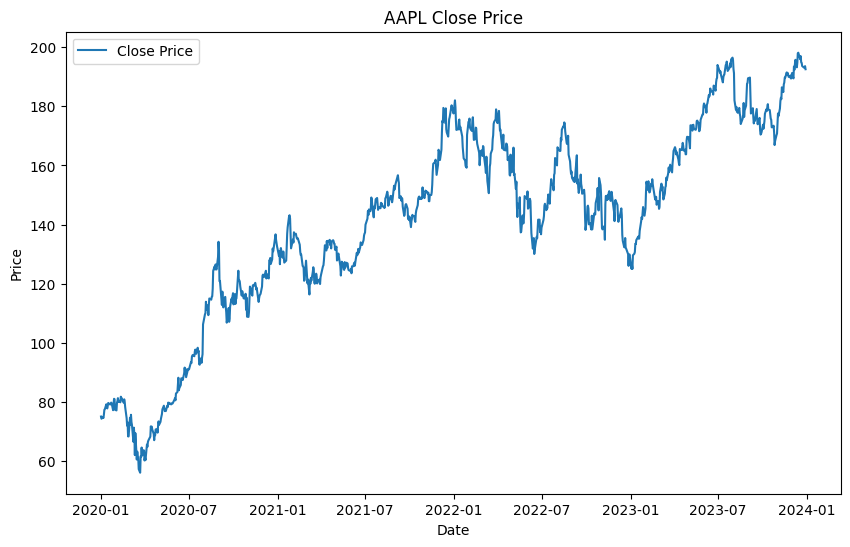

In [2]:
# Step 2: Visualize and check for stationarity
plt.figure(figsize=(10, 6))
plt.plot(data, label='Close Price')
plt.title(f'{ticker} Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


#### => Stock price data is usually non-stationarity (Can't have independence but still want consistency). Distribution depends only on difference in time not location in time.

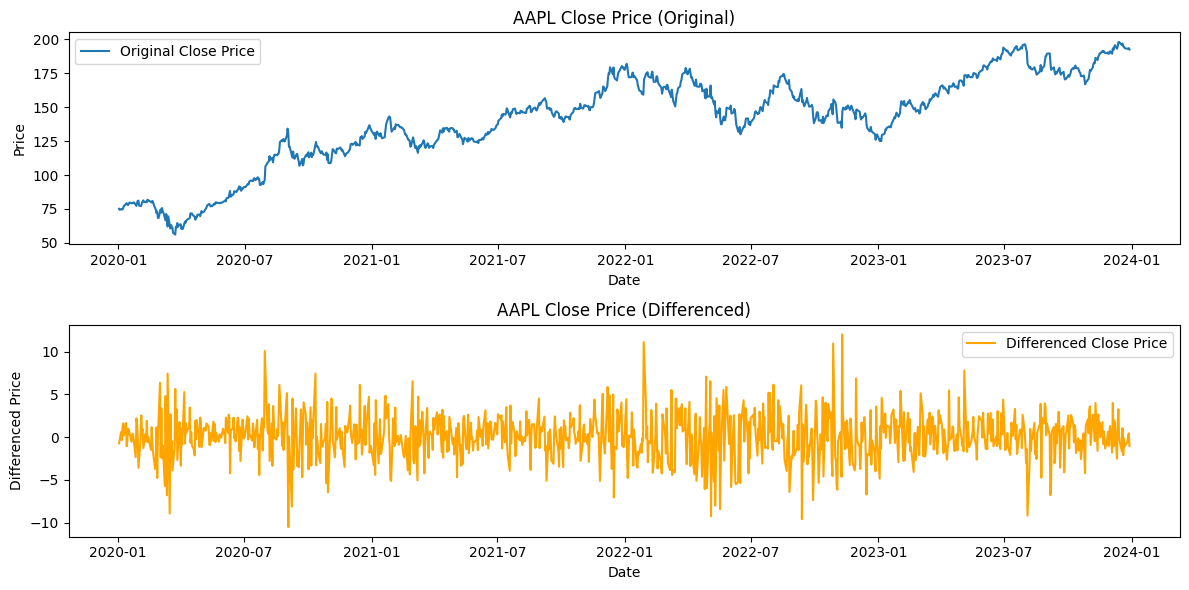

In [3]:
# Step 3: Differencing for stationarity (First-order differencing)
diff_data = data.diff().dropna()

# Plot the original data and the differenced data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Close Price')
plt.title(f'{ticker} Close Price (Original)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Differenced data
plt.subplot(2, 1, 2)
plt.plot(diff_data, label='Differenced Close Price', color='orange')
plt.title(f'{ticker} Close Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# MINIC (Minimum Information Criterion)

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define a function for MINIC to determine the best (p, q) for ARIMA
def minic(data, max_p=5, max_q=5):
    best_aic = np.inf
    best_order = None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(data, order=(p, 1, q))  # Assuming d=1 for differencing
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 1, q)
            except:
                continue
    return best_order, best_aic

# Example usage:
best_order, best_aic = minic(data)
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")


c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodel

Best ARIMA order: (5, 1, 2) with AIC: 4803.54260655204


c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


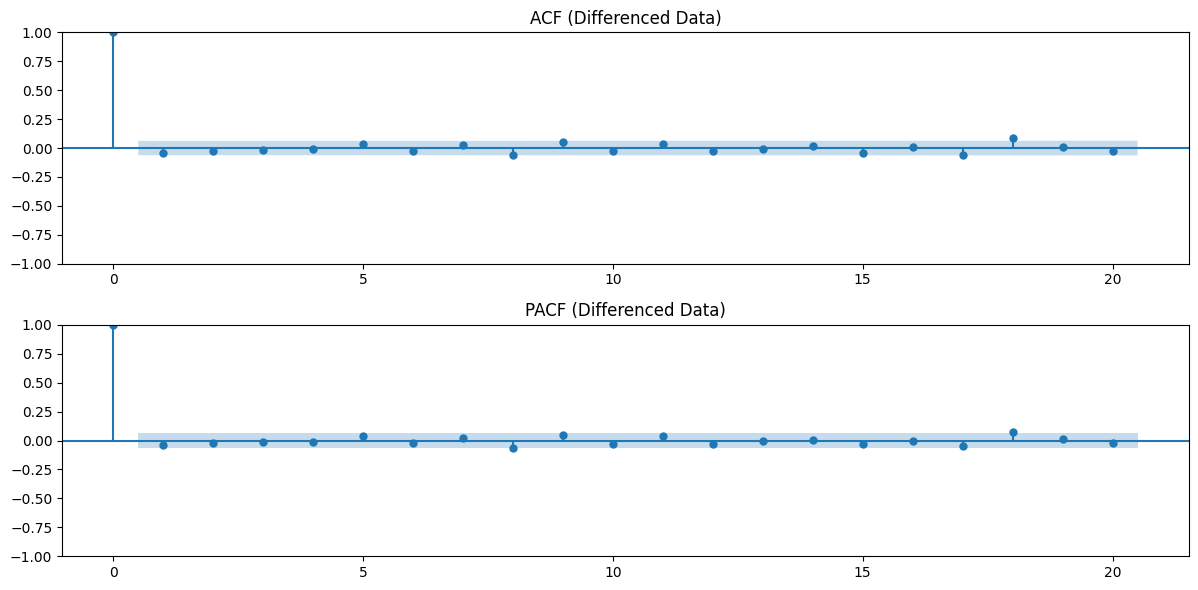

In [5]:
# Step 4: Plot the ACF and PACF for ESACF-like analysis
plt.figure(figsize=(12, 6))

# ACF plot for differenced data
plt.subplot(2, 1, 1)
plot_acf(diff_data, lags=20, ax=plt.gca(), title="ACF (Differenced Data)")

# PACF plot for differenced data
plt.subplot(2, 1, 2)
plot_pacf(diff_data, lags=20, ax=plt.gca(), title="PACF (Differenced Data)")

plt.tight_layout()
plt.show()

In [11]:
# Step 4: Train ARIMA model (example order (1,1,1))
model = ARIMA(data, order=(5, 1, 2))
fit_model = model.fit()

# Print summary
print(fit_model.summary())

c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodel

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2393.771
Date:                Tue, 03 Dec 2024   AIC                           4803.543
Time:                        14:13:38   BIC                           4842.845
Sample:                             0   HQIC                          4818.476
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8700      0.036    -51.723      0.000      -1.941      -1.799
ar.L2         -1.0370      0.064    -16.179      0.000      -1.163      -0.911
ar.L3         -0.0928      0.067     -1.385      0.1

[*********************100%***********************]  1 of 1 completed
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


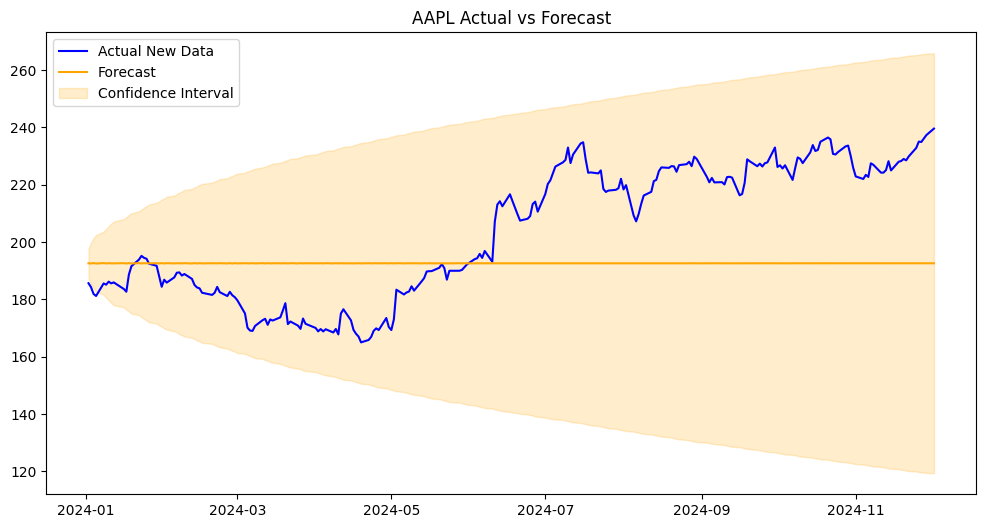

In [12]:
import datetime

# Step 3: Fetch new data
new_data = yf.download(ticker, start='2024-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))['Close'].dropna()
# new_data = yf.download(ticker, start='2024-01-01', end='2024-01-05')['Close'].dropna()

# Step 4: Forecast future values based on the trained model
# Forecast the same length as new_data to compare
forecast = fit_model.get_forecast(steps=len(new_data))
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Step 5: Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(new_data.index, new_data, label='Actual New Data', color='blue')
plt.plot(new_data.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(new_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title(f'{ticker} Actual vs Forecast')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Study\DS_502\S-P_500_Stock_Prediction\S-P_500_Stock_Prediction\.venv\Lib\site-packages\statsmodels

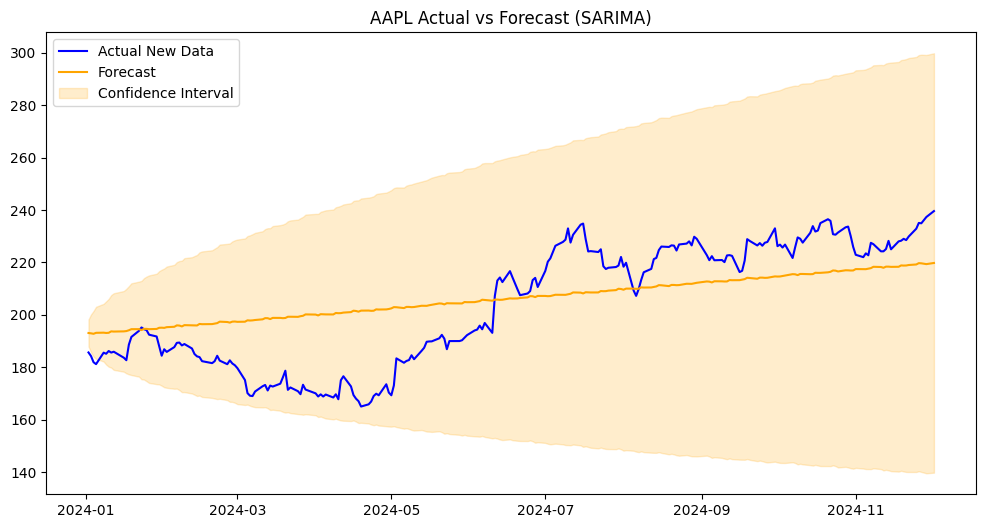

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

# Step 1: Fetch data using yfinance
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')['Close'].dropna()

# Step 2: Define SARIMA parameters
# Example parameters: (p, d, q)(P, D, Q, s)
# Adjust based on ACF/PACF analysis or grid search
p, d, q = 5, 1, 2  # Non-seasonal orders
P, D, Q, s = 1, 1, 1, 12  # Seasonal orders with yearly seasonality (s=12 for monthly data)

# Step 3: Fit the SARIMA model
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
fit_sarima = sarima_model.fit(disp=False)

# Step 4: Fetch new data for 2024
new_data = yf.download(ticker, start='2024-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))['Close'].dropna()

# Step 5: Forecast future values based on the trained model
# Forecast for the same length as the new data
forecast = fit_sarima.get_forecast(steps=len(new_data))
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Step 6: Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(new_data.index, new_data, label='Actual New Data', color='blue')
plt.plot(new_data.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(new_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title(f'{ticker} Actual vs Forecast (SARIMA)')
plt.legend()
plt.show()
